In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam

Using TensorFlow backend.


# 輸入、輸出資料整理

In [2]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

x_train = X_train.reshape(60000,28,28,1)/255
x_test = X_test.reshape(10000,28,28,1)/255

y_train = np_utils.to_categorical(Y_train,10) 
y_test = np_utils.to_categorical(Y_test,10)

# 利用 Functional API 建構 CNN 
* 做 **2 次** convolution，最後再接上 **2 次** max-pooling。
* filter 大小都是 $3\times3$、個數分別為 32、64 個 ，max-pooling 都用 $2\times2$ 為一小區塊。
* 最後再接 **1 個** dense 層，使用 **200 個**神經元。
* activation function 使用 relu；loss function 使用 categorical cross-entropy；optimizer 使用 Adam。

$${ \mathbb R }^{ 28\times 28 }\,\overset { { C }onv_{ 1 } }{ \longrightarrow  } \,{\mathbb R }^{ (28\times 28)\times 32 }\,\overset { { Conv }_{ 2 } }{ \longrightarrow  } \,{\mathbb R }^{ (28\times 28)\times 64 }\,\overset { { Pool }_{ 1 } }{ \longrightarrow  } \,{\mathbb R }^{ (14\times 14)\times 64 }\,\overset { { Pool }_{ 2 } }{ \longrightarrow  } \,{\mathbb R }^{ (7\times 7)\times 64 }\,\overset {\mathrm {flatten} }{ \longrightarrow  } \,{\mathbb R }^{ 3136 }\,\overset { { f }_{ 1 } }{ \longrightarrow  } \,{\mathbb R }^{ 200 }\,\overset { { f }_{ 2 } }{ \longrightarrow  } \,{\mathbb R }^{ 10 }$$

In [3]:
Conv1 = Conv2D(32, (3,3), padding='same', activation='relu')
Conv2 = Conv2D(64, (3,3), padding='same', activation='relu')
Pool1 = MaxPool2D(pool_size=(2,2))
Pool2 = MaxPool2D(pool_size=(2,2))
flatten = Flatten()
f1 = Dense(200, activation='relu')
f2 = Dense(10, activation='softmax')

x = Input(shape=(28,28,1))
z1 = Pool2(Pool1(Conv2(Conv1(x))))
z2 = flatten(z1)
y = f2(f1(z2))

model = Model(x,y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               627400    
__________

In [4]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['acc']) 
model.fit(x_train, y_train, batch_size=1000, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 249s 4ms/step - loss: 0.5523 - acc: 0.8501
Epoch 2/5
60000/60000 [==============================] - 240s 4ms/step - loss: 0.1147 - acc: 0.9658
Epoch 3/5
60000/60000 [==============================] - 227s 4ms/step - loss: 0.0696 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0518 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 210s 4ms/step - loss: 0.0410 - acc: 0.9877


In [5]:
predict = np.argmax(model.predict(x_test), axis=1)
score = model.evaluate(x_test, y_test)
print('testing data 的正確率：', score[1])

10000/10000 [==============================] - 11s 1ms/step
testing data 的正確率： 0.9868


# 看看哪些字寫得很醜

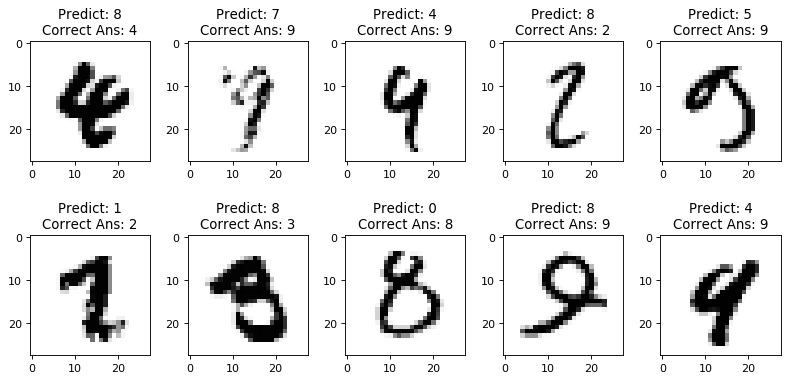

In [6]:
fail_img = X_test[predict!=Y_test]
fail_predict = predict[predict!=Y_test]
correct_ans = Y_test[predict!=Y_test]

idx = np.random.choice(range(fail_predict.size), size=10, replace=False) #隨機選10個預測錯誤的例子

plt.figure(figsize=(10,5), dpi=80)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(fail_img[idx[i]], cmap='Greys')
    plt.title('Predict: %d\nCorrect Ans: %d' %(fail_predict[idx[i]], correct_ans[idx[i]]))
    
plt.tight_layout()
plt.show()